In [1]:
import pickle as pkl
import pdb
import urllib.request
#import io
#from lxml import html
import requests
from bs4 import BeautifulSoup
import re

In [2]:
page = requests.get("https://www.ontario.ca/laws/statute/90b16")

In [3]:
def datascraping(page):
   #print ("start")
#status_code indicates if the page was downloaded successfully. status_code of 200 means success. status_code starting with 4 or 5 indicates an error
   #print (page.status_code)
   soup = BeautifulSoup(page.content, 'html.parser')
#print(soup.prettify())
   html_classes = ["paragraph", "subsection", "definition", "Pnote", "Yheadnote", "Ydefinition", "Ysection", "Yparagraph","Ysubsection", "Ysubpara","Ysubsubpara","Yclause", "Yfirstdef","subsubpara","section"]
   dict_soup_obj = {}
   corpus_dict = {}

   #this for loop creates a soup object for every html class we need 
   for elem in html_classes:
      dict_soup_obj[elem] = soup.find_all(class_ = elem)
      
   #pdb.set_trace()
   
   #this for loop is used to convert the soup object to string
   for elem in dict_soup_obj:
      corpus = []
      for lines in dict_soup_obj[elem]:
         corpus.append(str(lines))
      corpus_dict[elem] = (corpus)

   return corpus_dict

    
   
#the below function removes the html tags from the text
to_be_removed = re.compile('<.*?>')
def remove_html_tags(corpus, to_be_removed):
   for html_class in corpus:
      for idx in range(0, len(corpus[html_class])):
         corpus[html_class][idx] = re.sub(to_be_removed, '',corpus[html_class][idx])
   return corpus 

In [4]:
#Creating a final list of para to make a dataframe
d = datascraping(page)

d1 = remove_html_tags(d, to_be_removed)
d2 = list(d1.values())

#converting lists of list to a list
d4=[j for i in d2 for j in i]

In [5]:
#dataframe
import pandas as pd
df = pd.DataFrame(d4)


In [6]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 2323):
    review = re.sub('[^a-zA-Z]', ' ', df[0][i])
    review = review.lower()
    review = review.split()
    #ps = PorterStemmer()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    
corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pyamini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['body corporate person beneficially owns directly indirectly voting securities carrying per cent voting rights attached voting securities body corporate time outstanding',
 'b partner person',
 'c trust estate person substantial beneficial interest person serves trustee similar capacity',
 'relative person including person spouse relative home person',
 'e relative spouse person relative home person personne qui un lien',
 'relation document corporation copy document certified true copy officer thereof',
 'b relation document issued court copy document certified true copy seal court signed registrar thereof',
 'c relation document custody director copy document certified true copy director signed director officer ministry designated regulations copie certifi e conforme',
 'created communicated using telephonic electronic means',
 'b attached associated document information',
 'c made adopted person associate person document information case may signature lectronique',
 'corporation ma

In [7]:
df = pd.DataFrame(corpus)
df.head()

,0
0,body corporate person beneficially owns direct...
1,b partner person
2,c trust estate person substantial beneficial i...
3,relative person including person spouse relati...
4,e relative spouse person relative home person ...


In [8]:
#Word Frequency
df[0].str.split(expand=True).stack().value_counts()

c                 1388
corporation       1315
b                 1108
r                  708
subsection         604
may                572
shall              546
director           527
act                489
sched              423
person             392
shares             353
articles           345
section            330
meeting            293
notice             273
shareholders       266
directors          256
shareholder        255
order              249
court              238
certificate        220
securities         183
class              181
corporate          173
required           169
made               164
series             160
day                159
upon               156
                  ... 
publicly             1
contingency          1
declarations         1
constructing         1
parts                1
des                  1
highest              1
figurative           1
alphabetical         1
discontinuance       1
empowered            1
q                    1
speech     

In [9]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

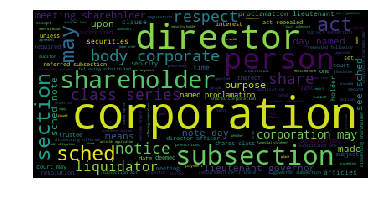

In [10]:
wordcloud2 = WordCloud().generate(' '.join(df[0]))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [11]:
doc_clean = [doc.split() for doc in corpus]


In [21]:
#converting lists of list to a list
#doc_clean_list=[j for i in doc_clean for j in i]
#doc_clean_list
#import numpy as np
#myarray = np.asarray(doc_clean_list)

In [12]:
#Finding optimum number of topics

import gensim
from gensim import corpora

# Create Dictionary
id2word = corpora.Dictionary(doc_clean)
print(id2word)
# Create Corpus
texts = doc_clean

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

C:\Users\pyamini\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Dictionary(2447 unique tokens: ['attached', 'beneficially', 'body', 'carrying', 'cent']...)
[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 3)]]


In [25]:
#Building LDA Mallet Model

# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
#mallet_path = 'C:/Users/pyamini/Downloads/mallet-2.0.8/mallet-2.0.8/bin/mallet' # update this path
import os
mallet_path = 'C://Users//pyamini//AppData//Local//Temp//mallet-2.0.8//bin//mallet//'
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)
# Show Topics
#pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
#coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
#coherence_ldamallet = coherence_model_ldamallet.get_coherence()
#print('\nCoherence Score: ', coherence_ldamallet)

In [43]:
#Function for finding the optimum number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [26]:

#model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=doc_clean, start=2, limit=40, step=6)

In [18]:
#First approach using TfidfVectorizer to create a document-term matrix with 5,000 terms(first thousand)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 5000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(df[0])

X.shape # check shape of the document-term matrix

(2323, 2332)

In [28]:
#Creating 13 Topics
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=13, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

13

In [29]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:30]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
repealed
 
sched
 
act
 
named
 
governor
 
lieutenant
 
proclamation
 
note
 
day
 
subsection
 
following
 
corporation
 
substituted
 
section
 
director
 
shall
 
articles
 
notice
 
certificate
 
shares
 
person
 
amended
 
shareholder
 
order
 
directors
 
meeting
 
required
 
shareholders
 
clause
 
court
 
Topic 1: 
repealed
 
proclamation
 
note
 
governor
 
lieutenant
 
named
 
day
 
substituted
 
following
 
sched
 
adding
 
paragraph
 
amended
 
definition
 
striking
 
act
 
substituting
 
end
 
november
 
council
 
portion
 
december
 
table
 
expression
 
cutting
 
red
 
tape
 
unnecessary
 
clear
 
jour
 
Topic 2: 
repealed
 
sched
 
shares
 
series
 
class
 
corporation
 
directors
 
meeting
 
shareholders
 
number
 
rights
 
restrictions
 
vote
 
issued
 
privileges
 
holders
 
shareholder
 
entitled
 
resolution
 
provide
 
holder
 
respect
 
agreement
 
person
 
stated
 
right
 
capital
 
proposal
 
share
 
beneficial
 
Topic 3: 
shares
 
series
 
class
 
c